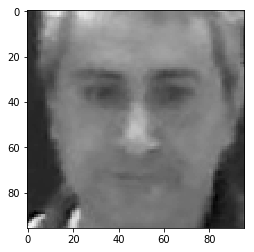

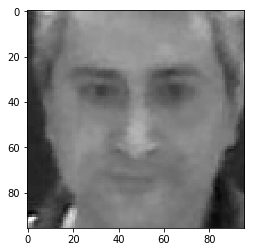

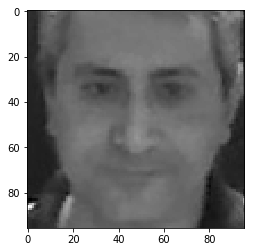

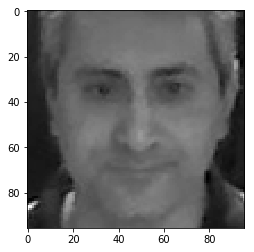

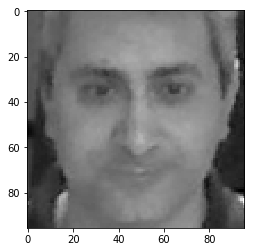

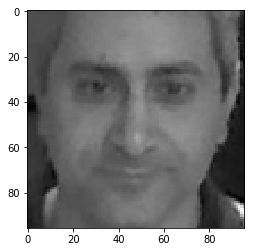

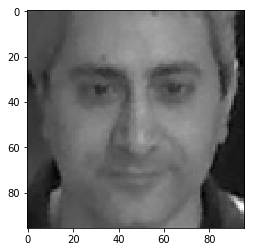

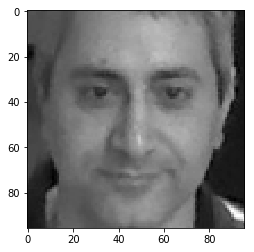

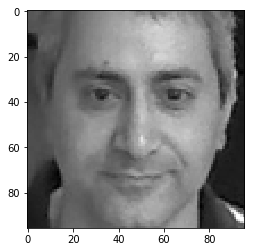

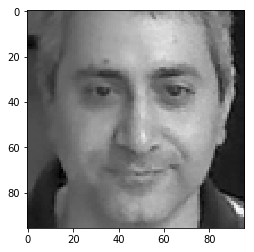

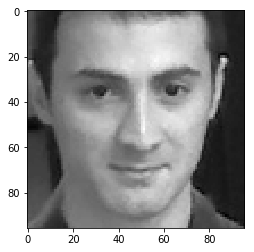

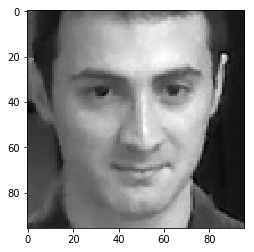

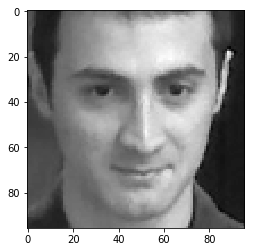

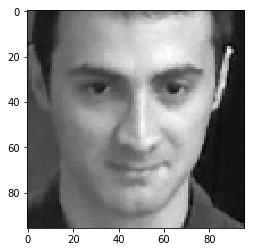

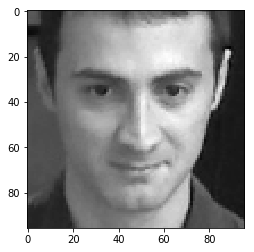

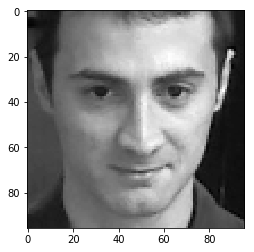

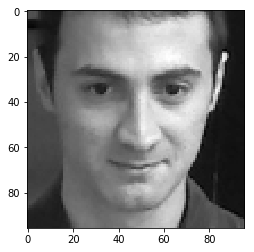

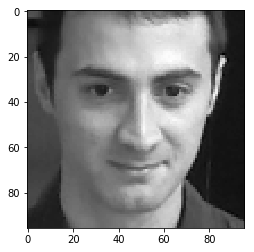

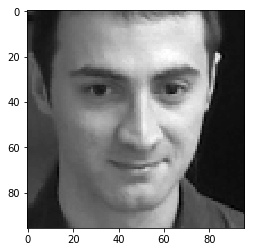

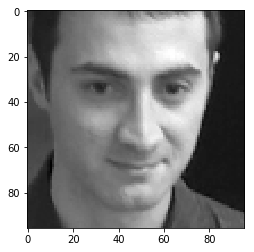

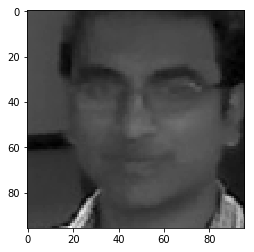

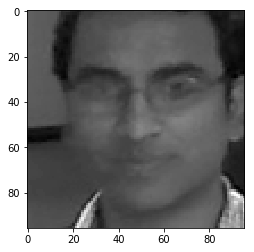

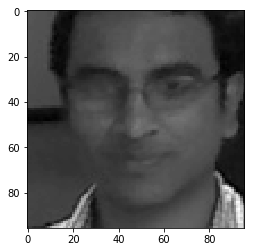

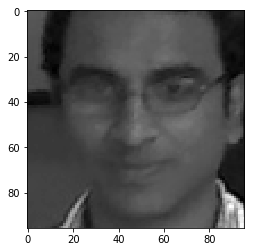

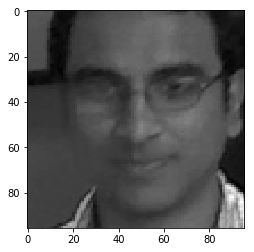

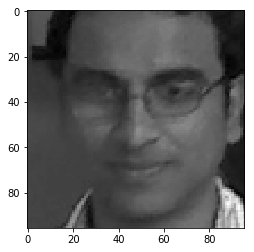

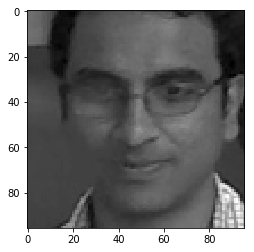

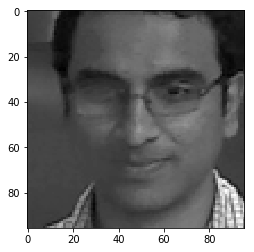

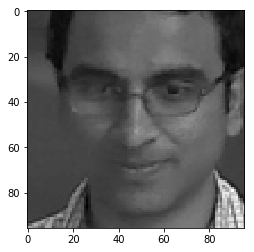

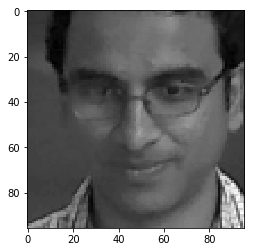

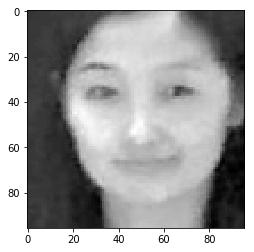

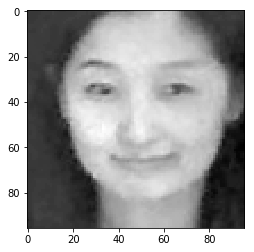

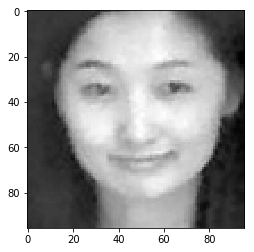

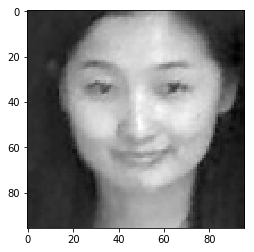

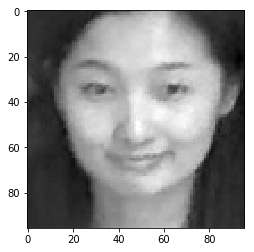

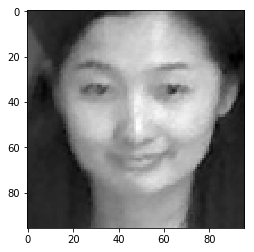

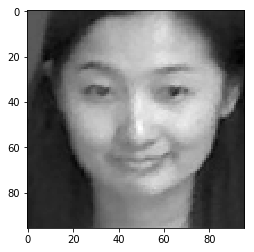

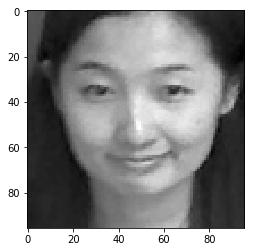

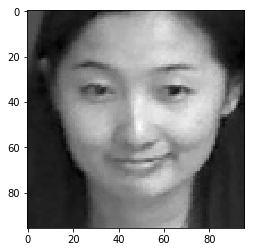

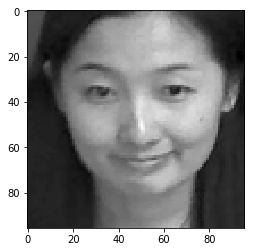

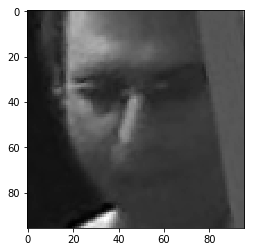

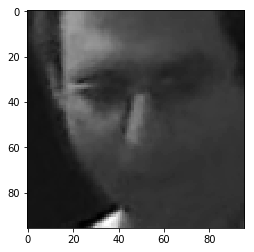

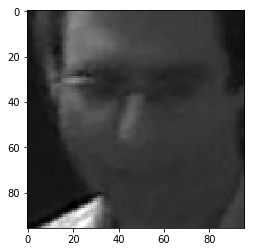

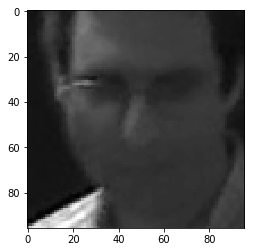

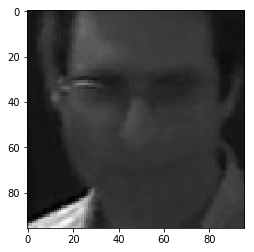

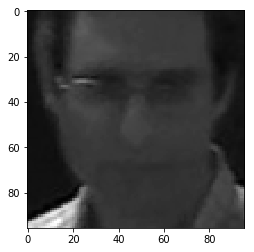

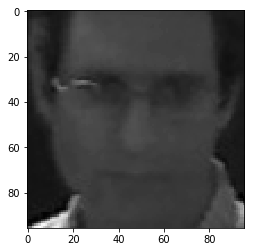

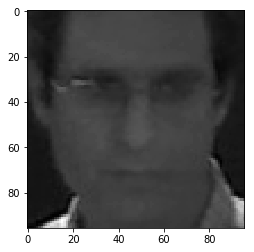

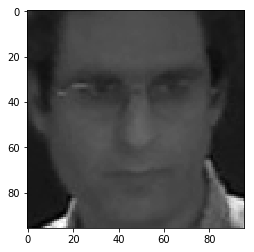

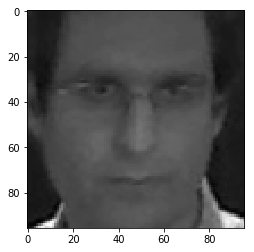

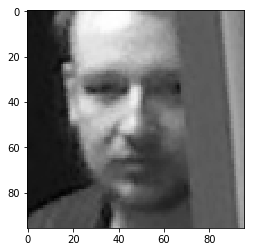

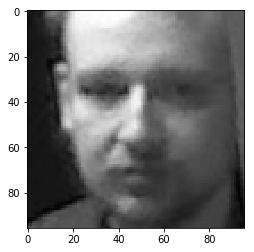

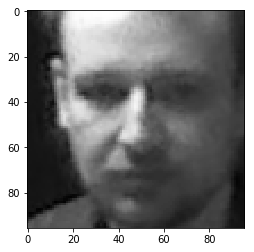

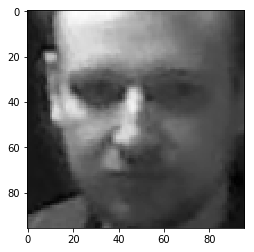

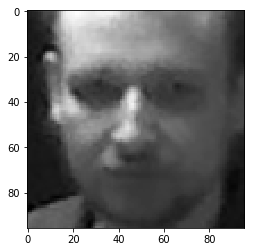

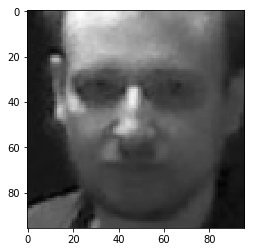

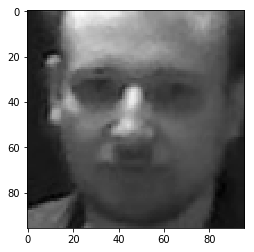

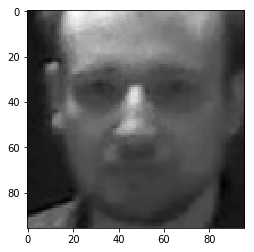

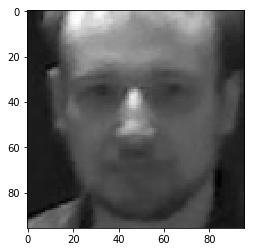

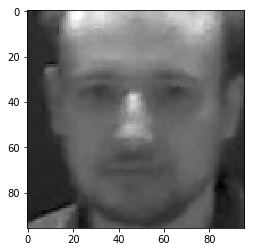

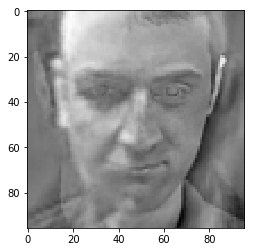

In [64]:
import scipy as py
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from PIL import Image
from scipy import misc
from cv2 import imread, imshow

#Control
rec =1
tolerance_rec = 50

#Initialize: k=5, skip=2, indiv=6  : 33.33%
k = 5

### Step 1: Load in Image, Flatten them, Obtain Mean Face and Subtract 

## Lets take out 6 individual frames for each person and test say on a random frame (Note we will train it prior)
person = ["0005", "0006", "0007", "0009", "0010", "0011"]
frame_start = [483, 3050, 3750, 3230, 2815, 4073]
test_frame = [481, 3070, 3745, 3235, 2820, 4080 ]

skip_frame = 2
indiv_image = 10
total_images = len(person) * indiv_image 

### Row = Image, Col = Person 
full_train_image = np.zeros((96*96, total_images)) 

for i in range( len(person) ) : 
    ### Checking if frame is 3 digit or 4 digit 
    if frame_start[i] / 1000 < 1 : 
        string_part = "00000"
    else : 
        string_part = "0000"
    
    ### 5 Individual Frames to add for training. Increment frames by 5. Loading it in grayscale  
    for j in range(indiv_image) : 
        #print(person[i])
        test_im = imread("P1E_S1_C1/" + person[i] + "/" + string_part + str(frame_start[i] + skip_frame*j) + ".pgm", 0)
        plt.imshow(test_im,  cmap = plt.cm.gray)
        plt.show() 
        ### If file fails 
        if test_im is None : 
            print("Lilith Died")
        else : 
            full_train_image[:, i*indiv_image+j] = test_im.flatten() 

# plt.imshow(test_im,  cmap = plt.cm.gray)
# plt.show() 

av_vect = np.zeros( (96*96, 1))
av_vect[:,0] = np.sum(full_train_image, axis = 1) / total_images

sub_mean_image = full_train_image - av_vect


### Step 2: Calculate Covariance Matrix/ Obtain highest k eigenvectors based on eigenvalues 
cov = np.dot(sub_mean_image.T, sub_mean_image )
w, v, vh = np.linalg.svd(cov) ### returns eigenvalues/eigenvectors normalized 

highest_eigen = np.flip(np.argsort(w) ) 
highest_eigenvector = np.zeros( (total_images, k) )


for i in range(k) : 
    highest_eigenvector[:,i] = v[highest_eigen[i]] 

eigenface = np.dot(sub_mean_image, highest_eigenvector) ## or u 

test = eigenface[:,1] 
test = np.reshape( test, (96,96) )
plt.imshow(test, cmap = plt.cm.gray)
plt.show() 
 



 


(9216, 60)
Test Image


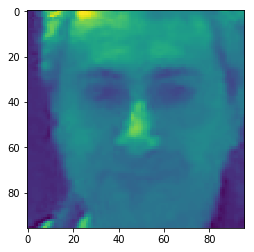

5


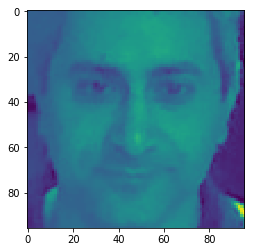

Test Image


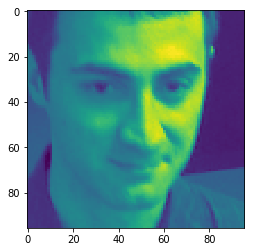

5


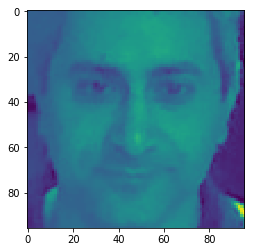

Test Image


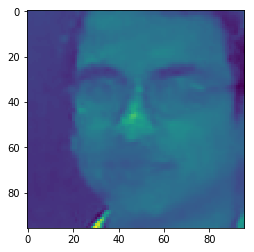

5


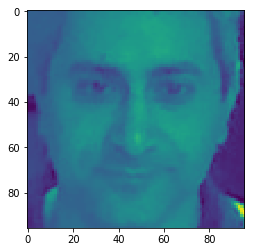

Test Image


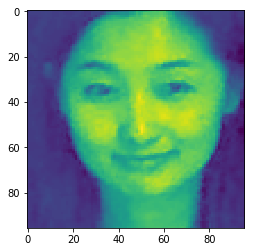

5


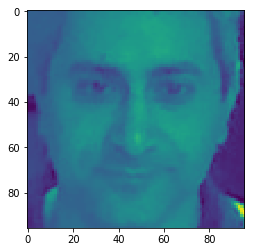

Test Image


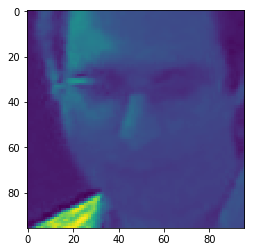

5


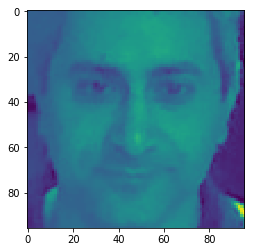

Test Image


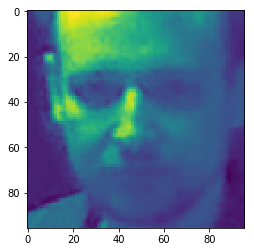

59


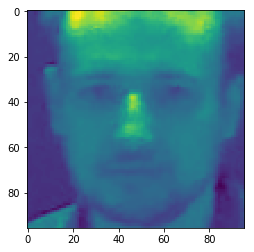

0.3333333333333333


In [66]:
### Step 3: Facial Recognition: Read Image -> Subtract Mean -> Project onto Eigen Face 

accuracy = 0 
print(full_train_image.shape) 

for i in range ( len(test_frame) ) : 
    person_num = person[i]
    
    if i == 0 : 
        string_part = "00000"
    else : 
        string_part = "0000"
        
    test_im = imread("P1E_S1_C1/" + person_num + "/" + string_part + str(test_frame[i] ) + ".pgm", 0)
    
    print("Test Image")
    plt.imshow(test_im)
    plt.show() 

    ### Get Weight for Train Image 
    weight_train = np.dot(eigenface.T, sub_mean_image)

    ### Get Weight for Test Image
    test_im_mean = test_im.reshape((96*96,1)) - av_vect 
    weight_test = np.dot(eigenface.T, test_im_mean)

    #print(weight_test.shape)
    total_error = [] 

    for j in range (total_images) : 
        error = np.linalg.norm( weight_train[:,j] - weight_test)
        total_error.append(error)

    classify = np.argmin(total_error)
    #print(total_error)
    print(classify)
    #print( i*6)
    
    if classify >= i*10  and classify <= (i+1)*10 - 1 :
        accuracy += 1 
        
        
    #print(total_error)
#     print(classify)
    
    plt.imshow( full_train_image[:,classify].reshape( (96,96) ) ) 
    plt.show() 

print( accuracy/len(person))